<a href="https://colab.research.google.com/github/tejjusbhat/EDA_EU_Sales/blob/main/EU_Sales_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

#Initializing Setup

In [2]:
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'

<ipython-input-2-4c2b812506a0>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [3]:
path = "https://raw.githubusercontent.com/tejjusbhat/EDA_EU_Sales/main/Europe%20Sales%20Records.csv"
df = pd.read_csv(path)

In [4]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Europe,Czech Republic,Beverages,Offline,C,9/12/2011,478051030,9/29/2011,4778,47.45,31.79,226716.10,151892.62,74823.48
1,Europe,Bosnia and Herzegovina,Clothes,Online,M,10/14/2013,919133651,11/4/2013,927,109.28,35.84,101302.56,33223.68,68078.88
2,Europe,Austria,Cereal,Offline,C,8/13/2014,987410676,9/6/2014,5616,205.70,117.11,1155211.20,657689.76,497521.44
3,Europe,Bulgaria,Office Supplies,Online,L,10/31/2010,672330081,11/29/2010,6266,651.21,524.96,4080481.86,3289399.36,791082.50
4,Europe,Estonia,Fruits,Online,L,9/28/2016,579463422,11/1/2016,4958,9.33,6.92,46258.14,34309.36,11948.78


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          1330 non-null   object 
 1   Country         1330 non-null   object 
 2   Item Type       1330 non-null   object 
 3   Sales Channel   1330 non-null   object 
 4   Order Priority  1330 non-null   object 
 5   Order Date      1330 non-null   object 
 6   Order ID        1330 non-null   int64  
 7   Ship Date       1330 non-null   object 
 8   Units Sold      1330 non-null   int64  
 9   Unit Price      1330 non-null   float64
 10  Unit Cost       1330 non-null   float64
 11  Total Revenue   1330 non-null   float64
 12  Total Cost      1330 non-null   float64
 13  Total Profit    1330 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 145.6+ KB


#Cleaning the Data

In [6]:
df.columns = df.columns.str.replace(" ","_")

In [7]:
df["Order_Date"] = pd.to_datetime(df["Order_Date"])
df["Ship_Date"] = pd.to_datetime(df["Ship_Date"])

#EDA

Text(0.5, 1.0, 'Item Popularity')

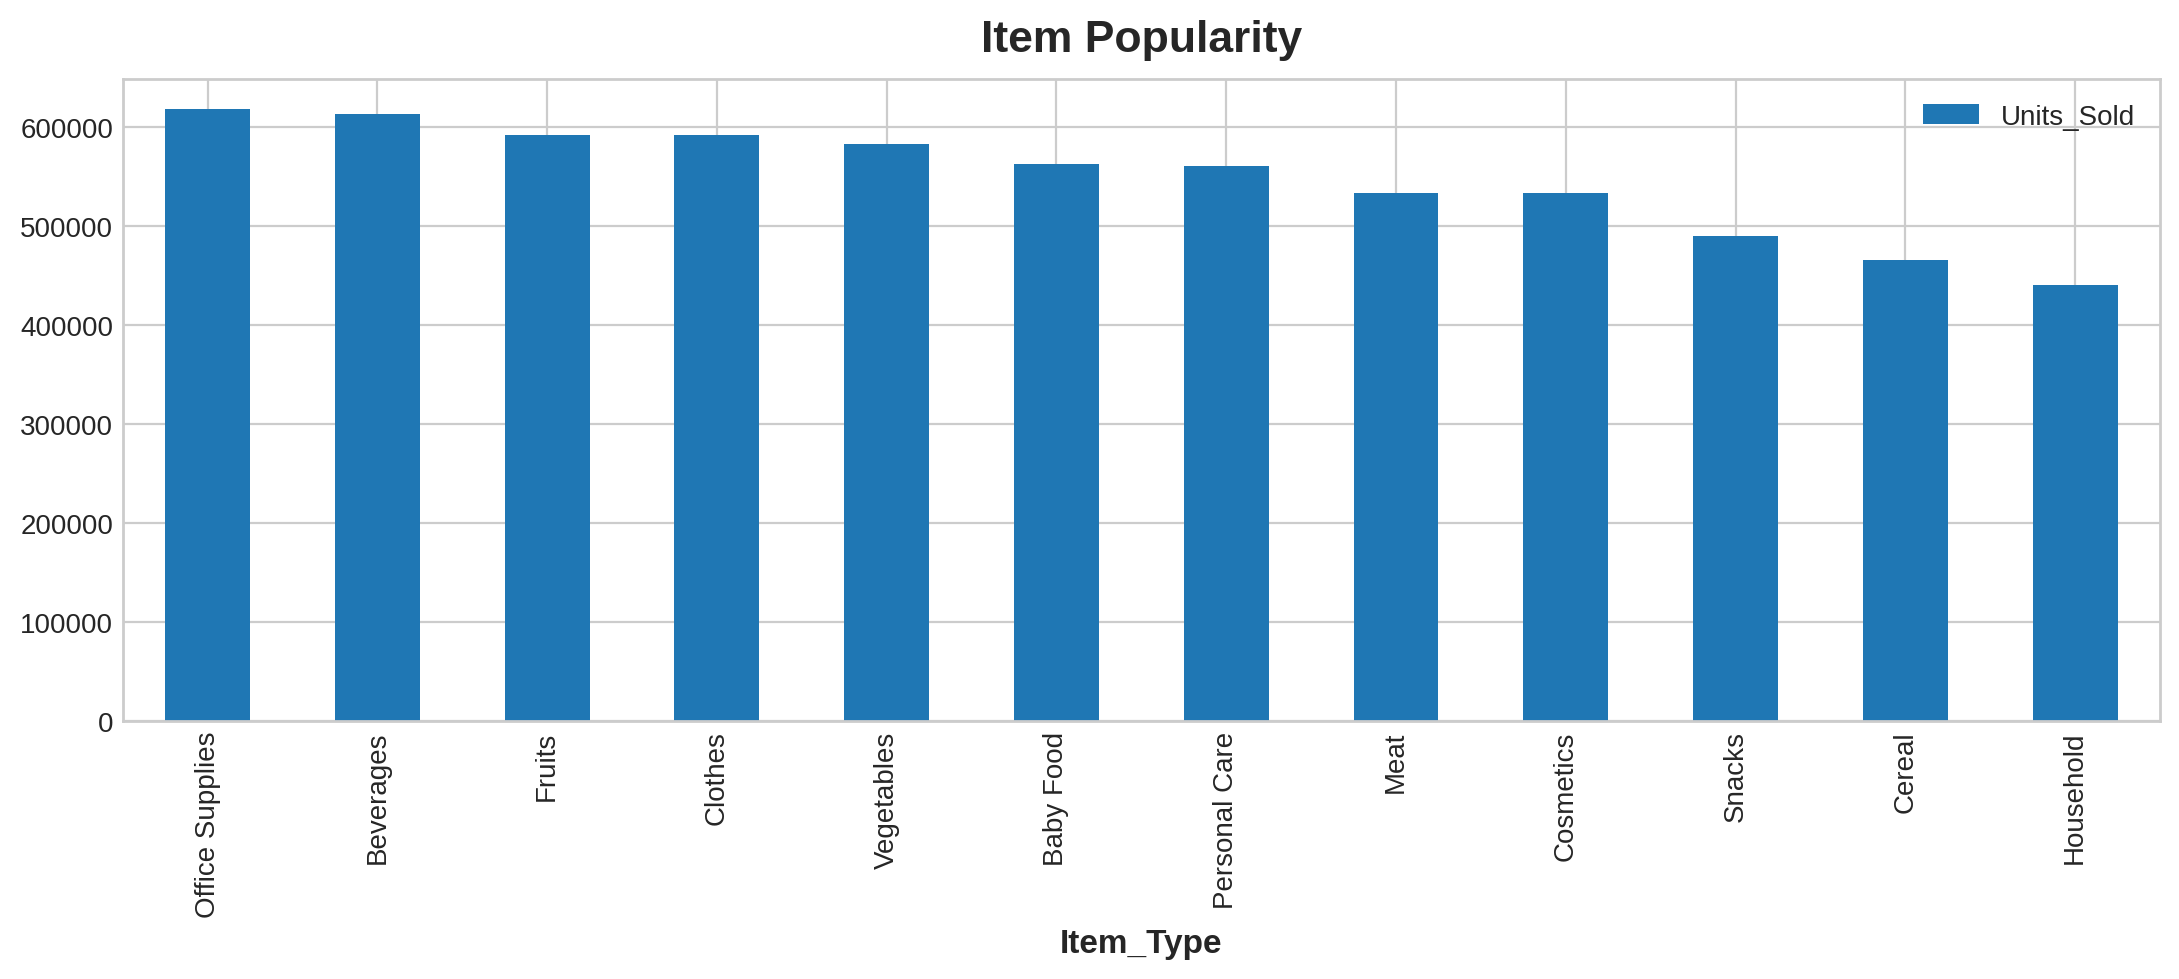

In [8]:
df.groupby("Item_Type")[["Units_Sold"]].sum().sort_values(by="Units_Sold",
ascending=False).plot(kind='bar')
plt.title("Item Popularity")

### Inference
We can see that office supplies is the most popular product. While household items are least popular by quite a margin.

Text(0.5, 1.0, 'Item Revenue Generated')

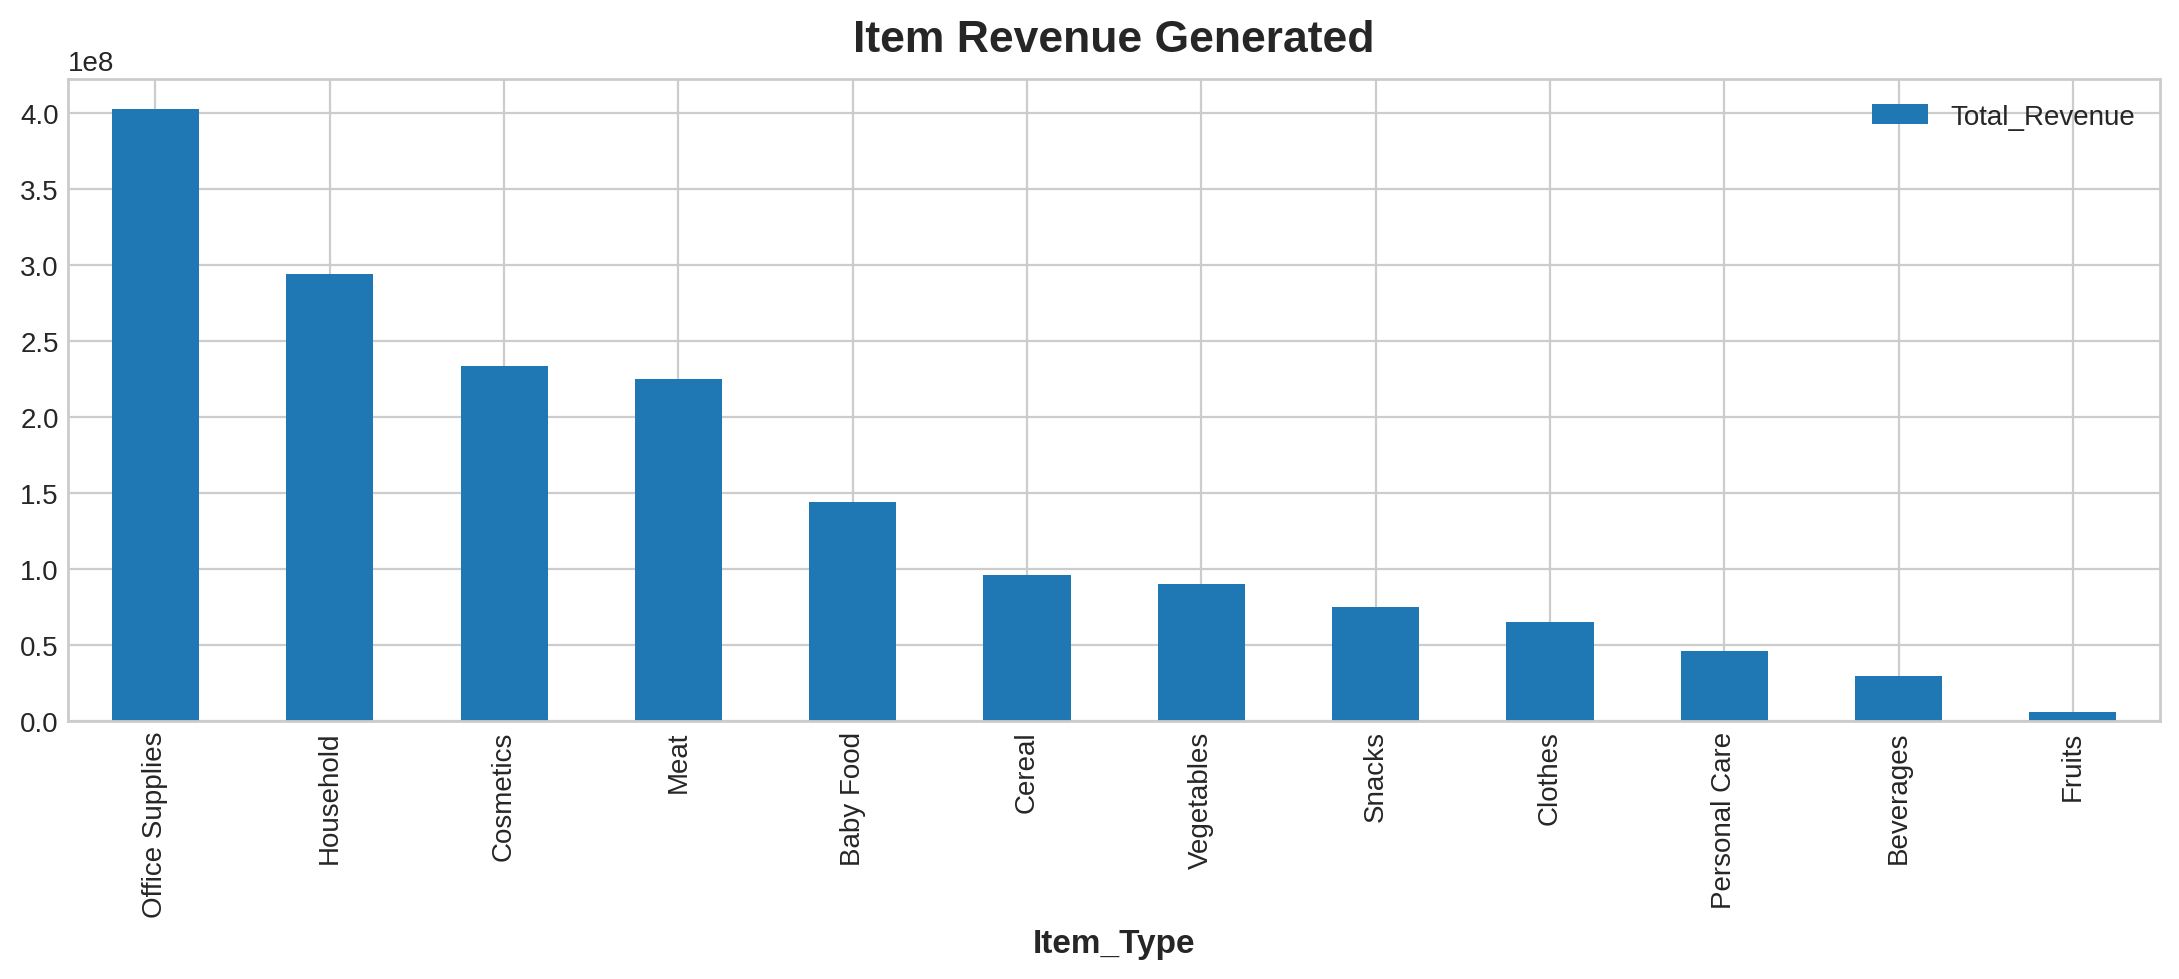

In [9]:
df.groupby("Item_Type")[['Total_Revenue']].sum().sort_values(by='Total_Revenue',
ascending=False).plot(kind='bar')
plt.title("Item Revenue Generated")

### Inference
This plot tells us that Office Supplies are not only the most popular but also generate a lot of revenue. Household might be less popular but it is still second in terms of generating revenue.

Food and Beverages on the other hand generate a lot less amount of revenues.

Text(0.5, 1.0, 'Revenue Generated By Each Country')

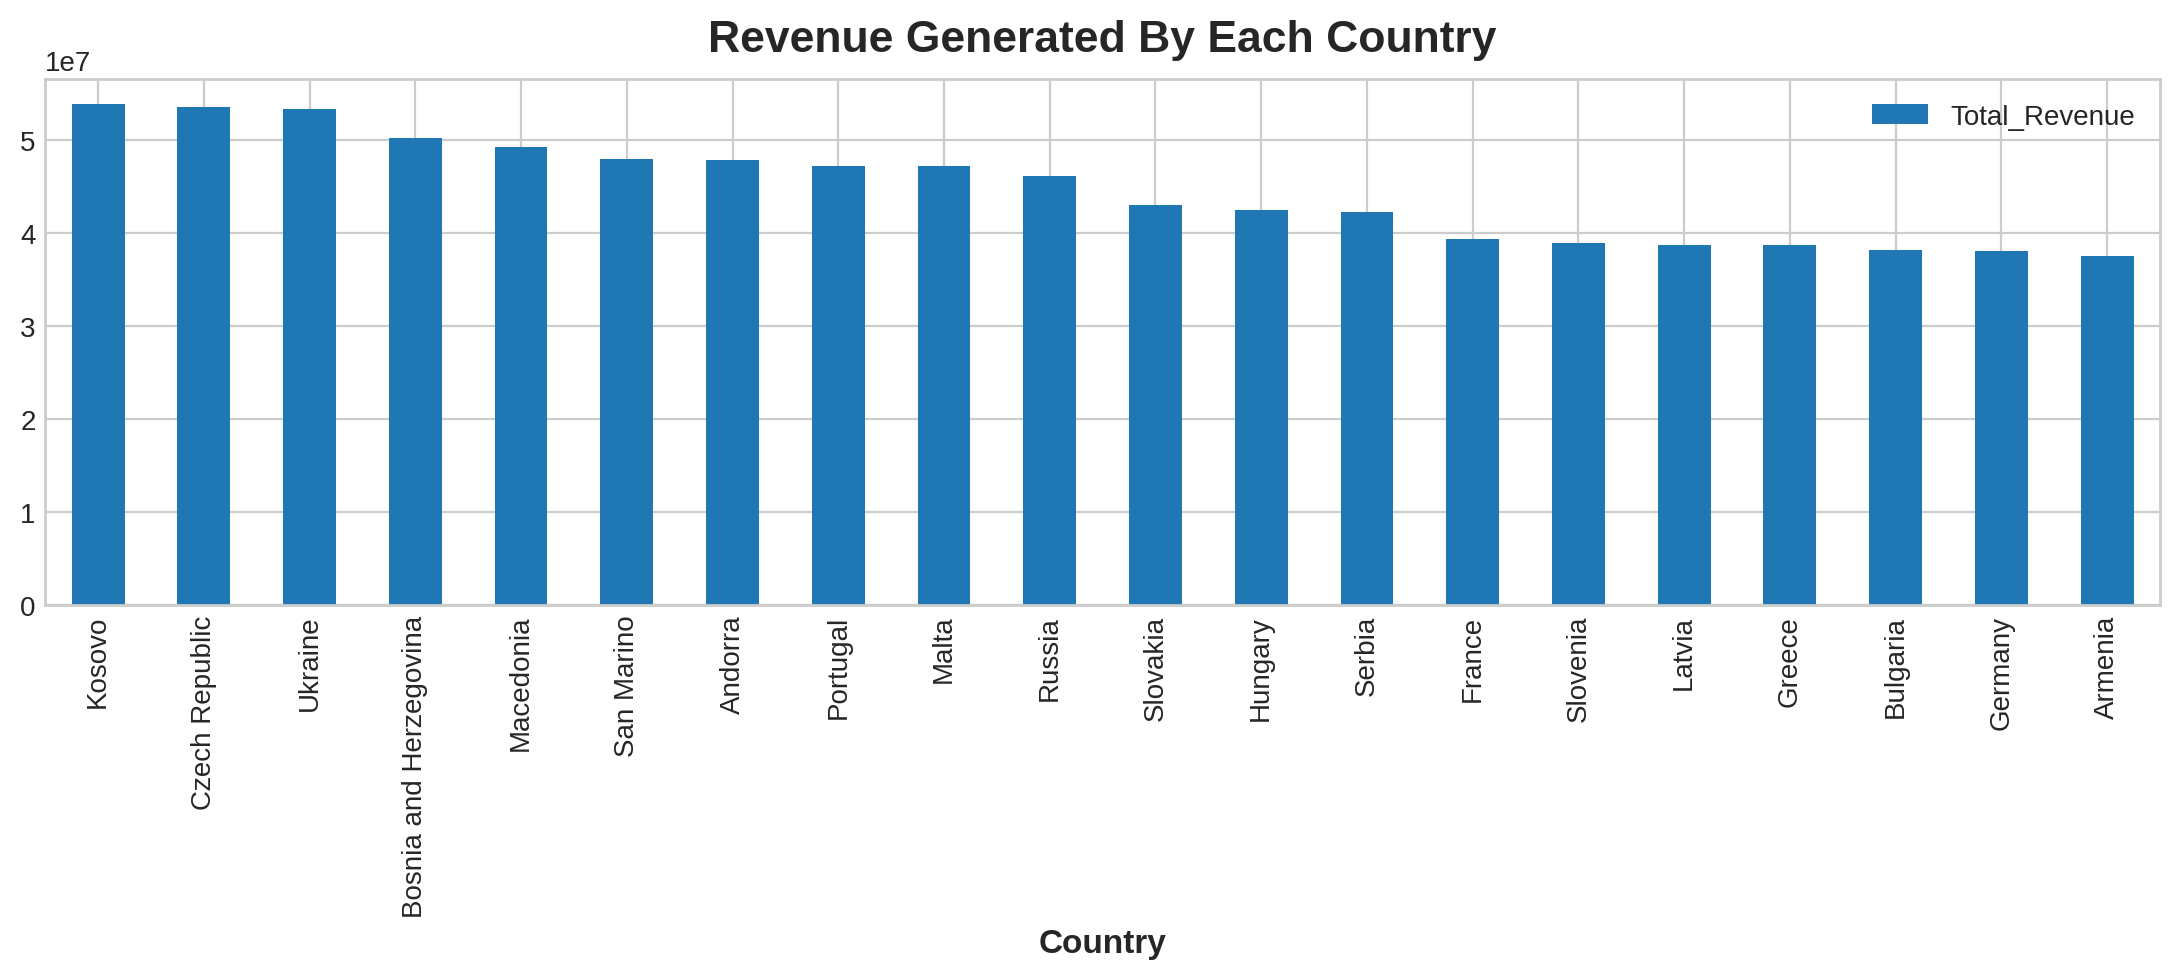

In [10]:
df.groupby('Country')[['Total_Revenue']].sum().sort_values(by='Total_Revenue',
ascending=False).head(20).plot(kind='bar')
plt.title("Revenue Generated By Each Country")

### Inference

We can see that Kosovo, Czech Republic and Ukraine who neighbour Russia are also generating the most revenue. Possibly because they need that revenue due to their tensions with Russia.

While Armenia and Germany generate lesser amount of revenue in comparison.

Text(0.5, 1.0, 'Sales Channel Comparison')

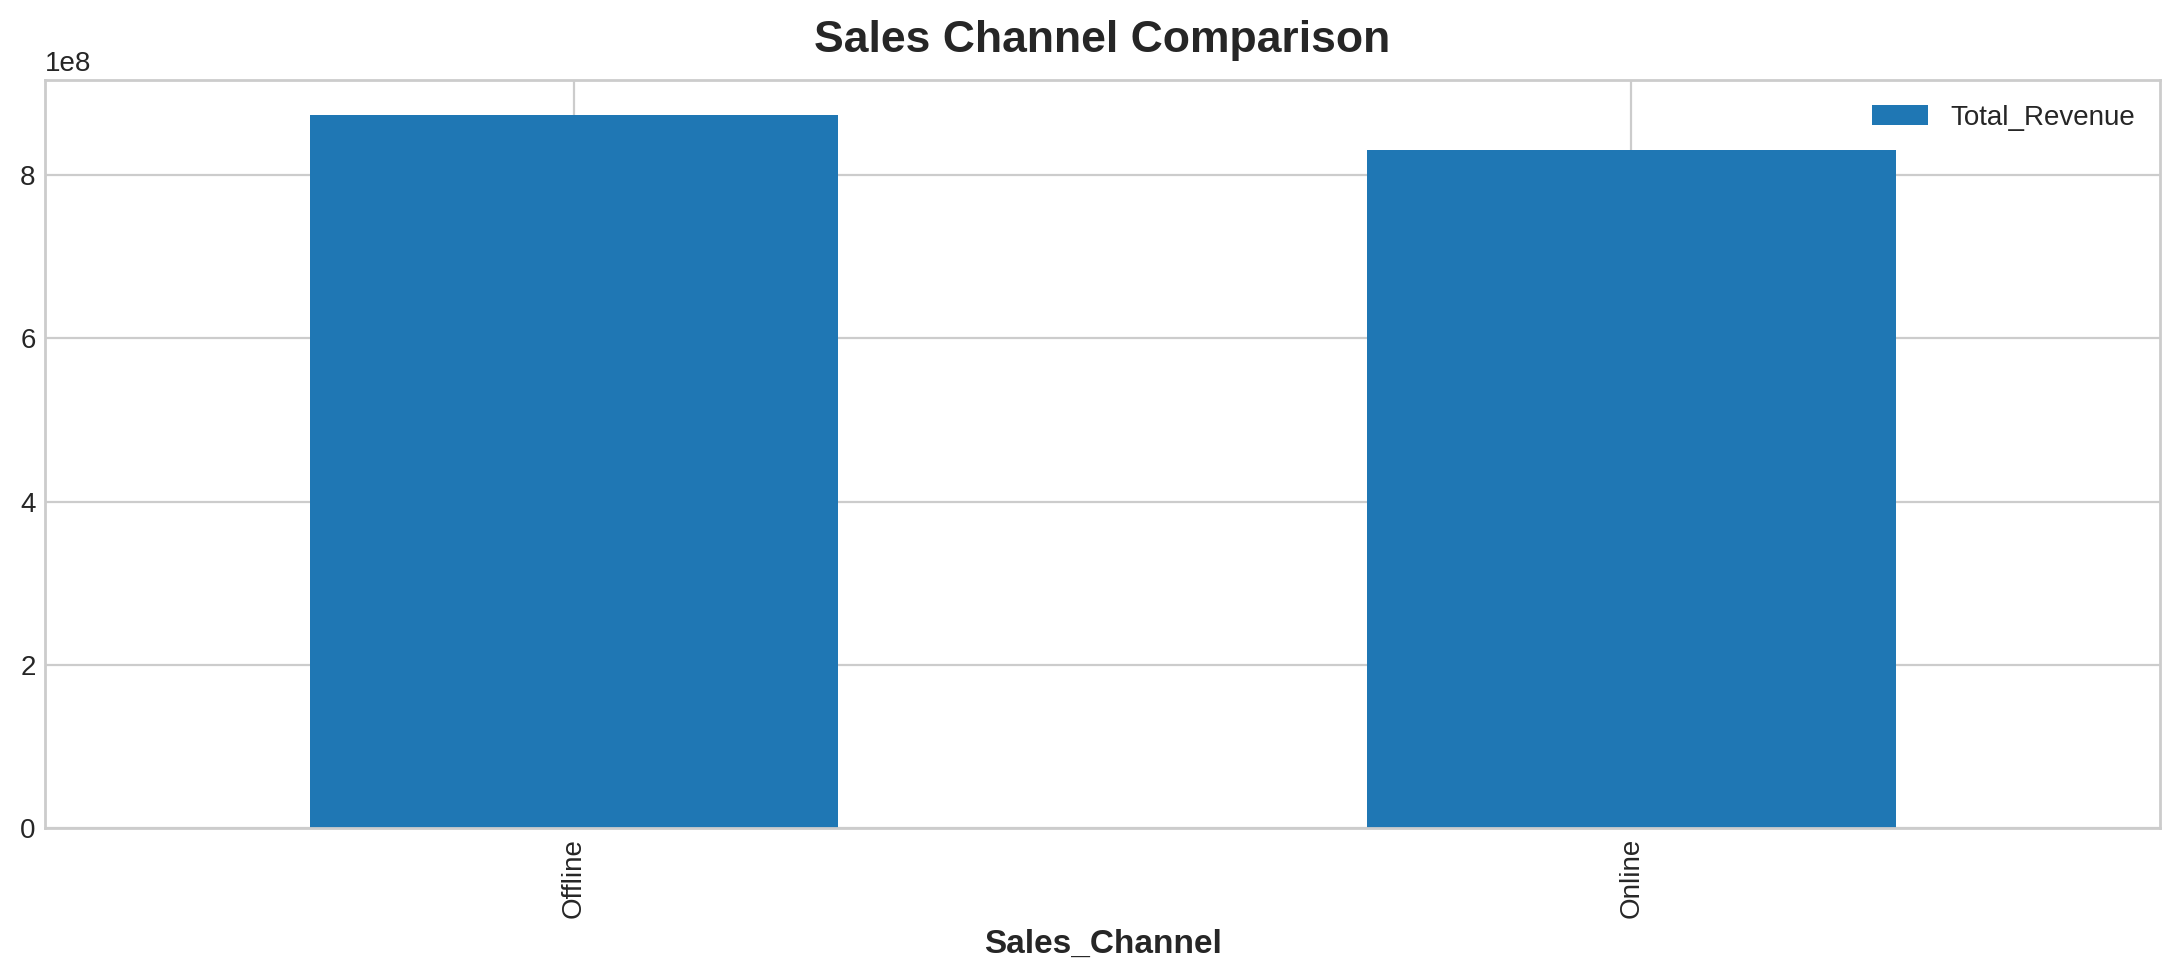

In [11]:
df.groupby('Sales_Channel')[['Total_Revenue']].sum().sort_values(by='Total_Revenue',
ascending=False).head(20).plot(kind='bar')
plt.title("Sales Channel Comparison")

### Inference

As we can see, offline sales are still prevailing over online sales.

# Time Series Analysis


In [12]:
df.Order_Date

0      2011-09-12
1      2013-10-14
2      2014-08-13
3      2010-10-31
4      2016-09-28
          ...    
1325   2014-01-14
1326   2014-04-14
1327   2015-11-09
1328   2012-05-09
1329   2014-04-22
Name: Order_Date, Length: 1330, dtype: datetime64[ns]

In [13]:
df['Year'] = df.Order_Date.dt.year
df['Month'] = df.Order_Date.dt.month
df['Day'] = df.Order_Date.dt.day

In [14]:
df['Delivery_time'] = df.Ship_Date - df.Order_Date
df['Delivery_time'] = df.Delivery_time.dt.days

In [15]:
import calendar

df['Month_name'] = df['Month'].apply(lambda x: calendar.month_name[x])
df['Day_name'] = df['Day'].apply(lambda x: calendar.day_name[x % 7])

In [16]:
df['Month_name'].unique()

array(['September', 'October', 'August', 'May', 'July', 'February',
       'March', 'January', 'April', 'December', 'November', 'June'],
      dtype=object)

In [17]:
df.head()

,Region,Country,Item_Type,Sales_Channel,Order_Priority,Order_Date,Order_ID,Ship_Date,Units_Sold,Unit_Price,Unit_Cost,Total_Revenue,Total_Cost,Total_Profit,Year,Month,Day,Delivery_time,Month_name,Day_name
0,Europe,Czech Republic,Beverages,Offline,C,2011-09-12,478051030,2011-09-29,4778,47.45,31.79,226716.10,151892.62,74823.48,2011,9,12,17,September,Saturday
1,Europe,Bosnia and Herzegovina,Clothes,Online,M,2013-10-14,919133651,2013-11-04,927,109.28,35.84,101302.56,33223.68,68078.88,2013,10,14,21,October,Monday
2,Europe,Austria,Cereal,Offline,C,2014-08-13,987410676,2014-09-06,5616,205.70,117.11,1155211.20,657689.76,497521.44,2014,8,13,24,August,Sunday
3,Europe,Bulgaria,Office Supplies,Online,L,2010-10-31,672330081,2010-11-29,6266,651.21,524.96,4080481.86,3289399.36,791082.50,2010,10,31,29,October,Thursday
4,Europe,Estonia,Fruits,Online,L,2016-09-28,579463422,2016-11-01,4958,9.33,6.92,46258.14,34309.36,11948.78,2016,9,28,34,September,Monday


Text(0.5, 0, 'Month')

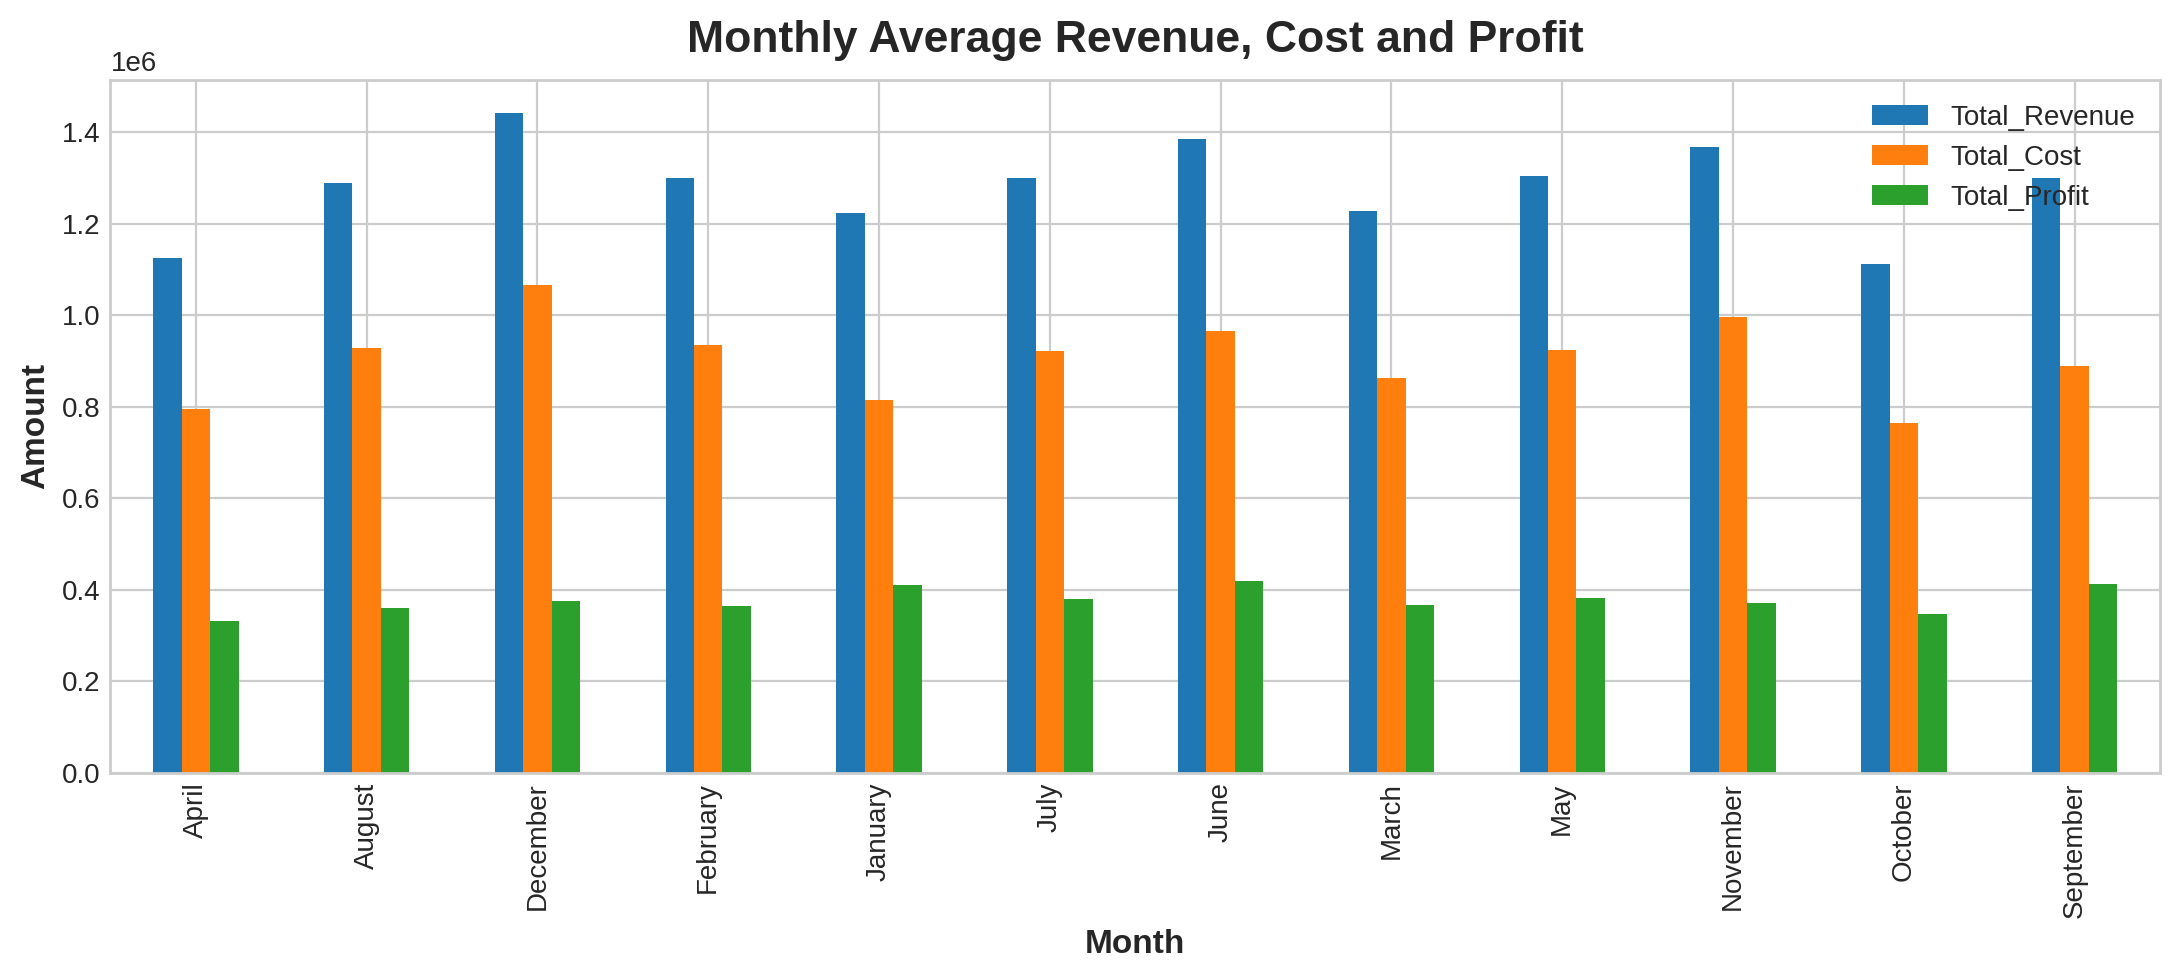

In [18]:
ax = df.groupby('Month_name')[['Total_Revenue','Total_Cost','Total_Profit']].mean().plot(kind='bar')
plt.title('Monthly Average Revenue, Cost and Profit')
ax.set_ylabel('Amount')
ax.set_xlabel('Month')

Plot showing the average monthly revenue, cost and profit.

Text(0.5, 0, 'Year')

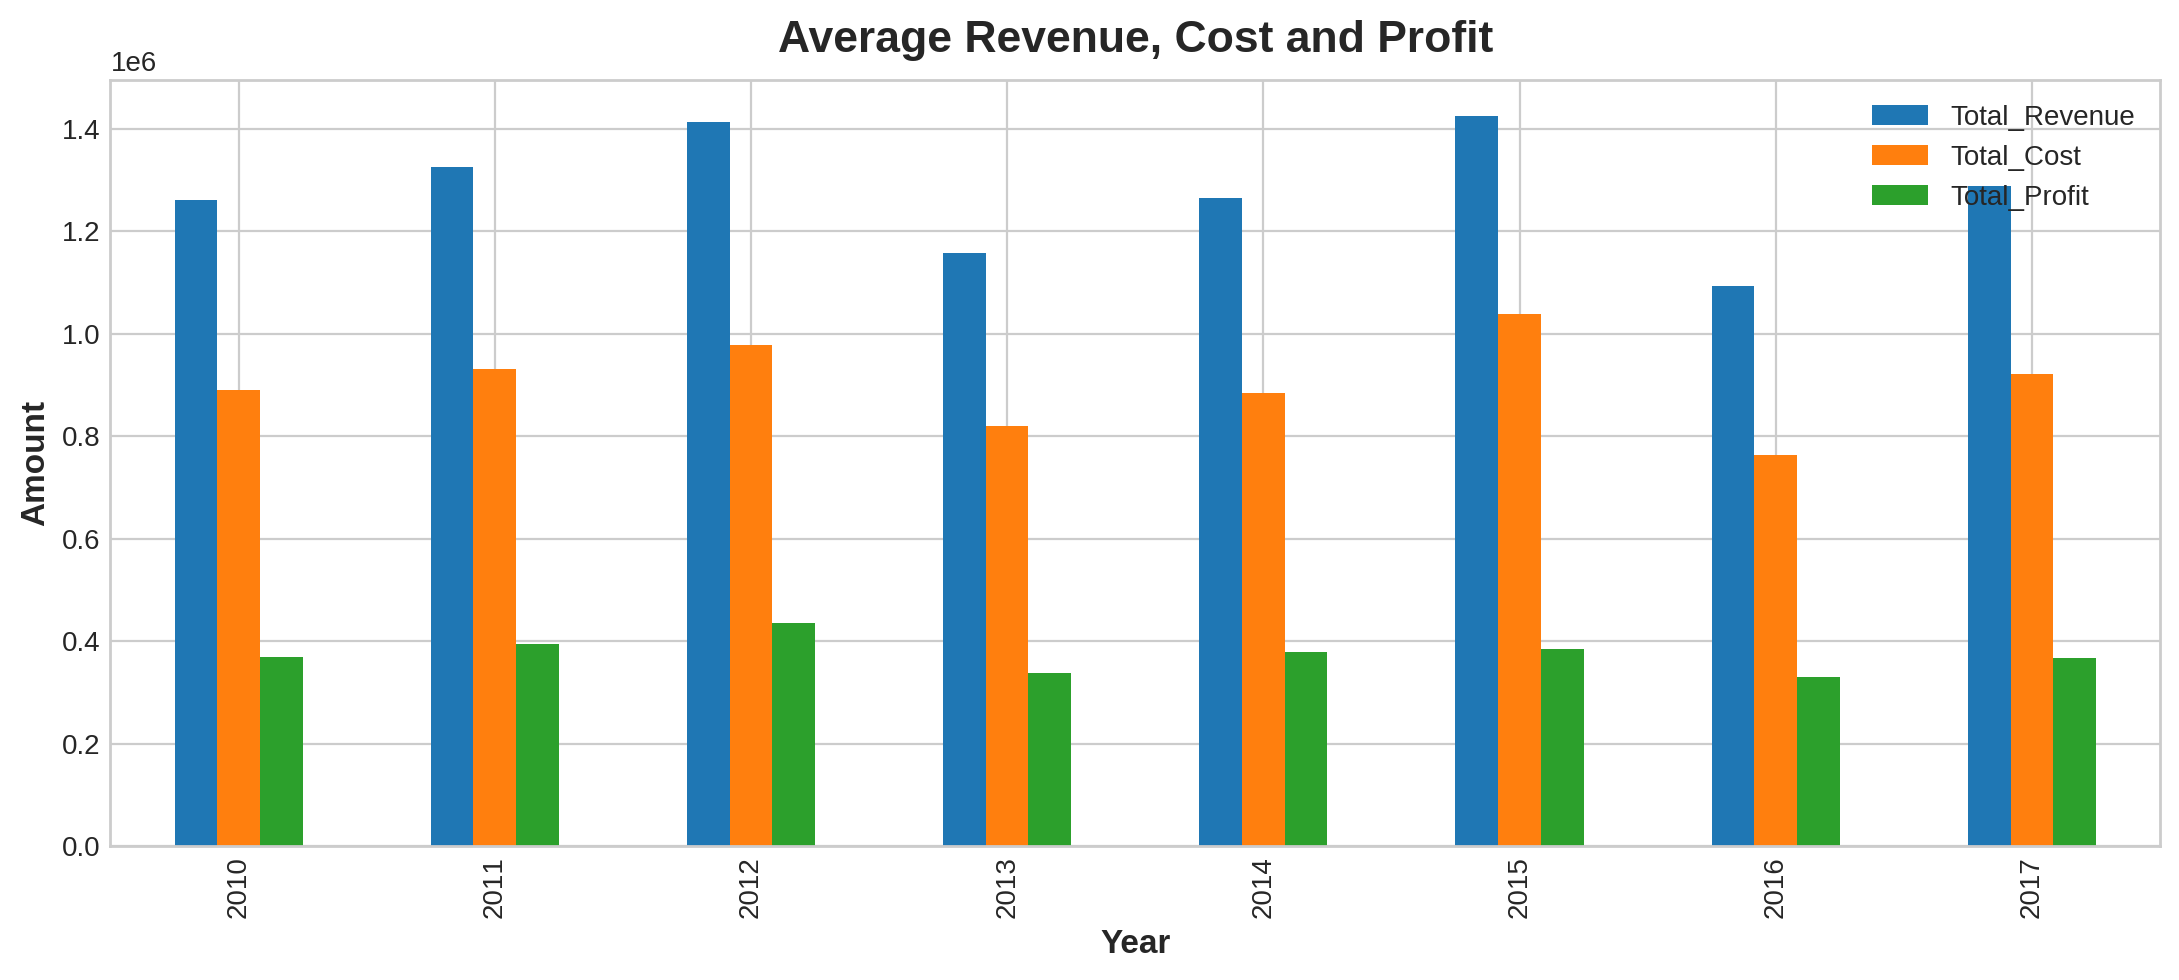

In [19]:
ax = df.groupby('Year')[['Total_Revenue','Total_Cost','Total_Profit']].mean().plot(kind='bar')
plt.title('Average Revenue, Cost and Profit')
ax.set_ylabel('Amount')
ax.set_xlabel('Year')

Plot showing revenue, cost and profit per year

Text(0.5, 0, 'Weekday')

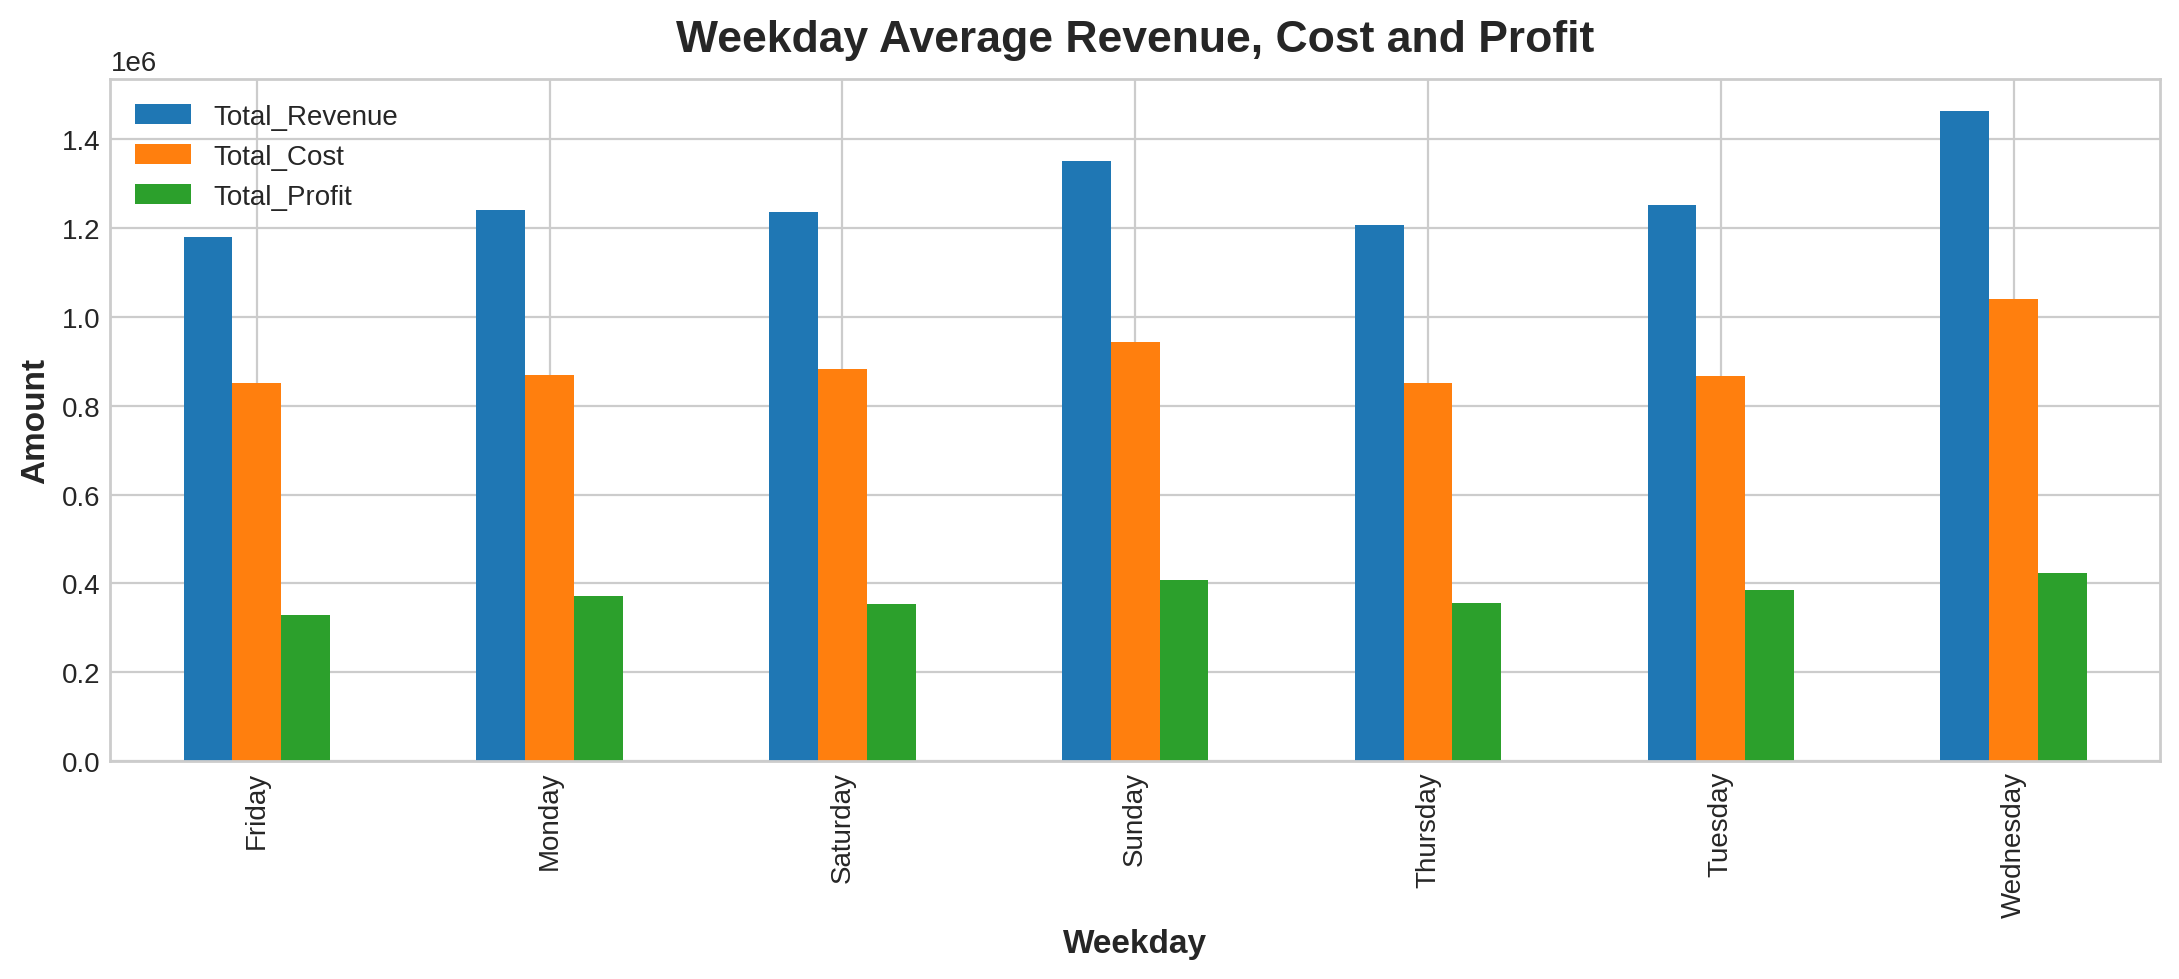

In [20]:
ax = df.groupby('Day_name')[['Total_Revenue','Total_Cost','Total_Profit']].mean().plot(kind='bar')
plt.title('Weekday Average Revenue, Cost and Profit')
ax.set_ylabel('Amount')
ax.set_xlabel('Weekday')

Text(0.5, 0, 'Delivery Time')

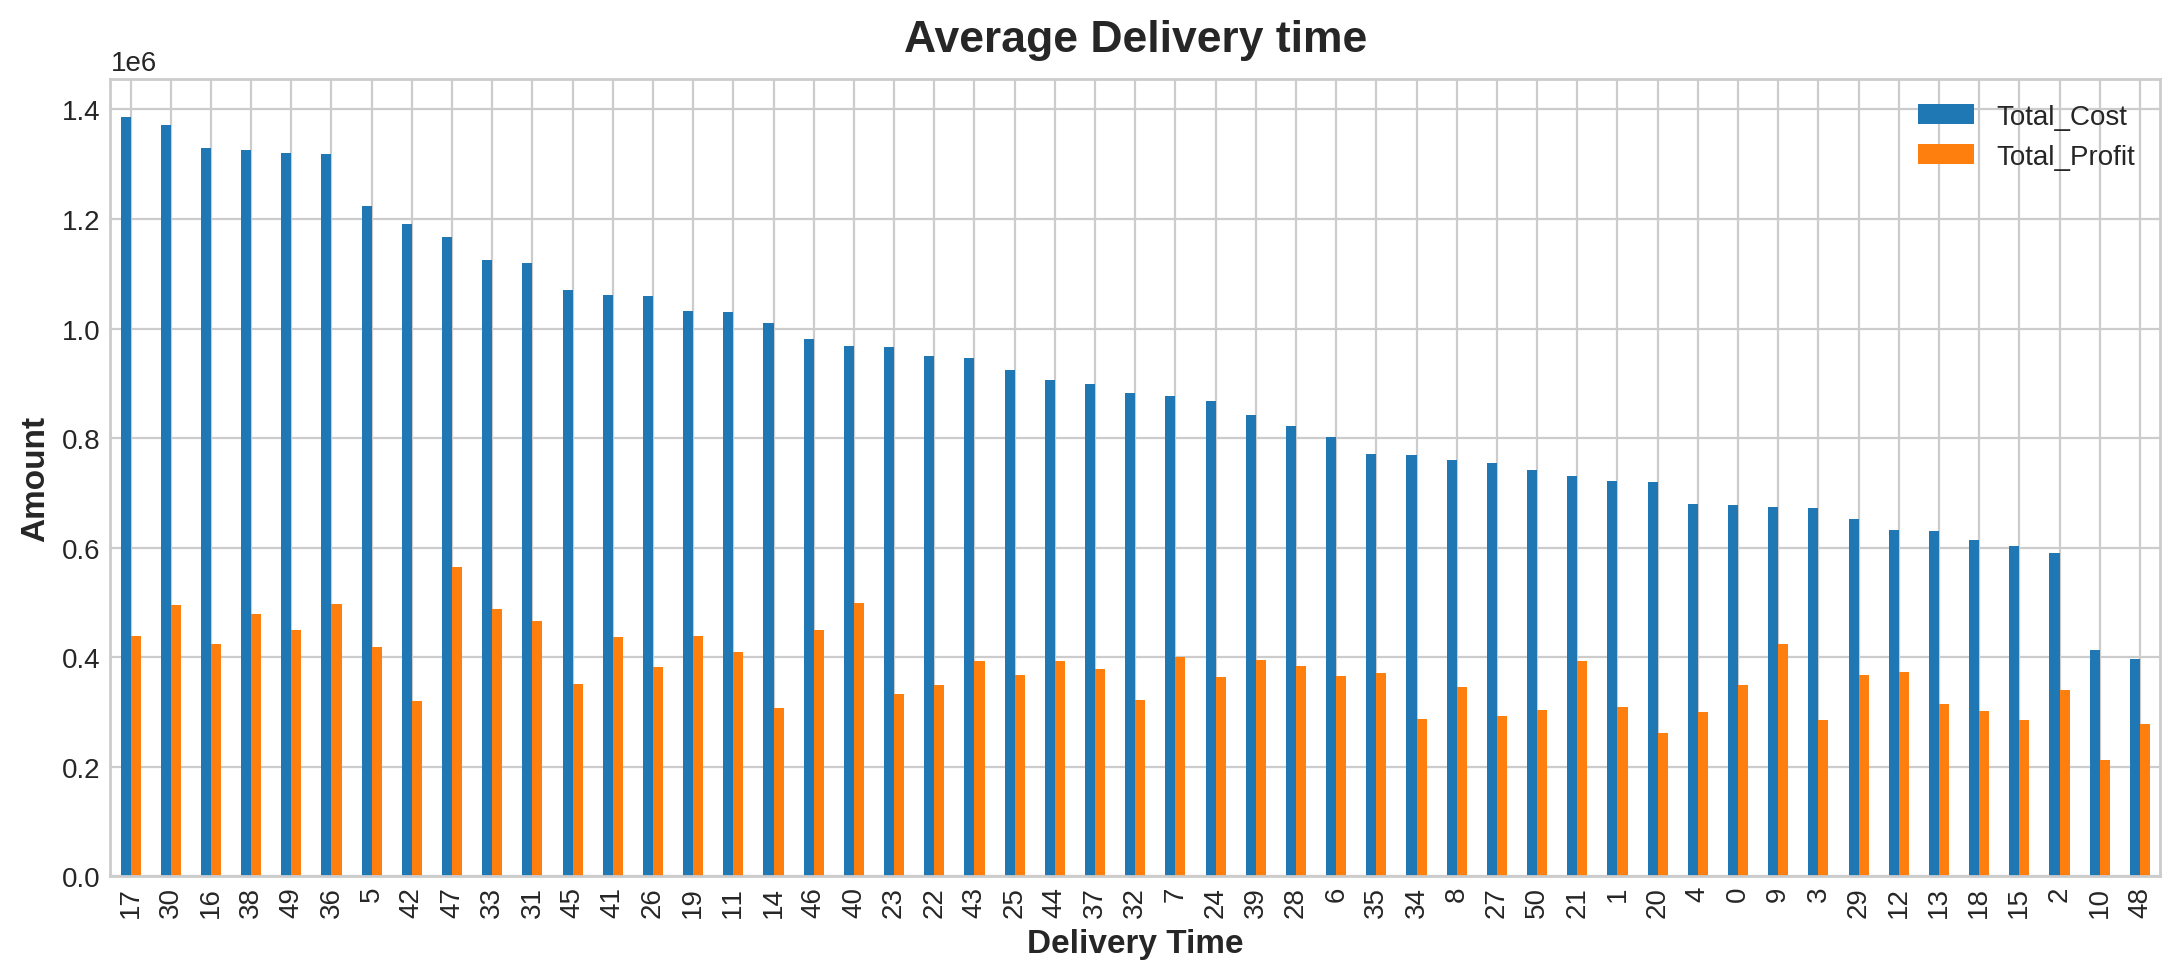

In [21]:
ax = df.groupby('Delivery_time')[['Total_Cost','Total_Profit']].mean().sort_values(by='Total_Cost', ascending=False).plot(kind='bar')
plt.title('Average Delivery time')
ax.set_ylabel('Amount')
ax.set_xlabel('Delivery Time')

From this we can see that, delivery time does not affect the profit.

In [22]:
sales_df = df.groupby('Order_Date')[['Total_Revenue','Total_Cost','Total_Profit']].mean()
sales_df.head()

,Total_Revenue,Total_Cost,Total_Profit
Order_Date,,,
2010-01-01,1982612.08,1194706.430,787905.650
2010-01-03,34204.64,11217.920,22986.720
2010-01-06,1302418.80,784460.070,517958.730
2010-01-10,1079706.99,561806.805,517900.185
2010-01-11,1445980.25,912179.220,533801.030


Text(0, 0.5, 'Amount')

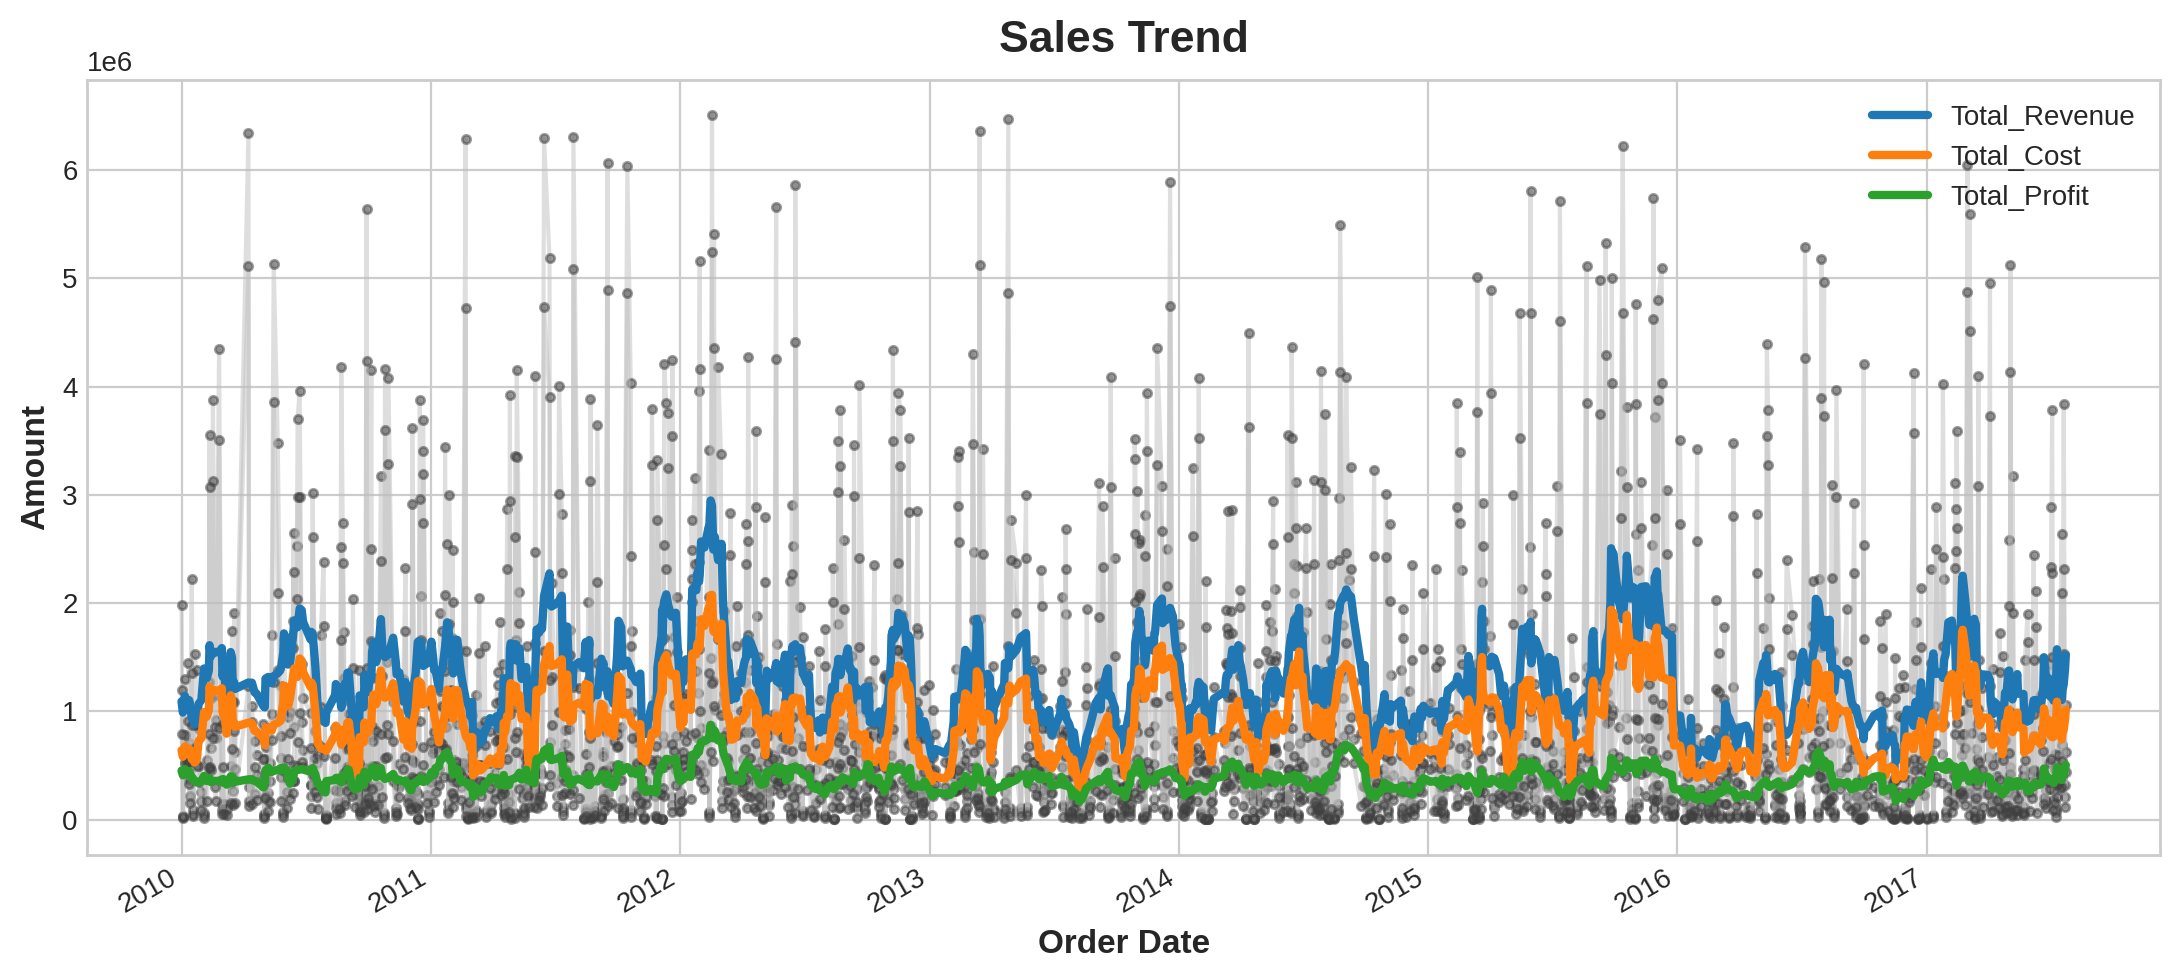

In [23]:
trend = sales_df.rolling(window=12,center=True,min_periods=6).mean()

ax = sales_df.plot(**plot_params, alpha=0.5)
ax = trend.plot(ax=ax, linewidth=3)
plt.title("Sales Trend")
plt.xlabel("Order Date")
plt.ylabel("Amount")

This shows that the economy is fairly stable.

In [24]:
def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("365D") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax

<Axes: title={'center': 'Periodogram'}, ylabel='Variance'>

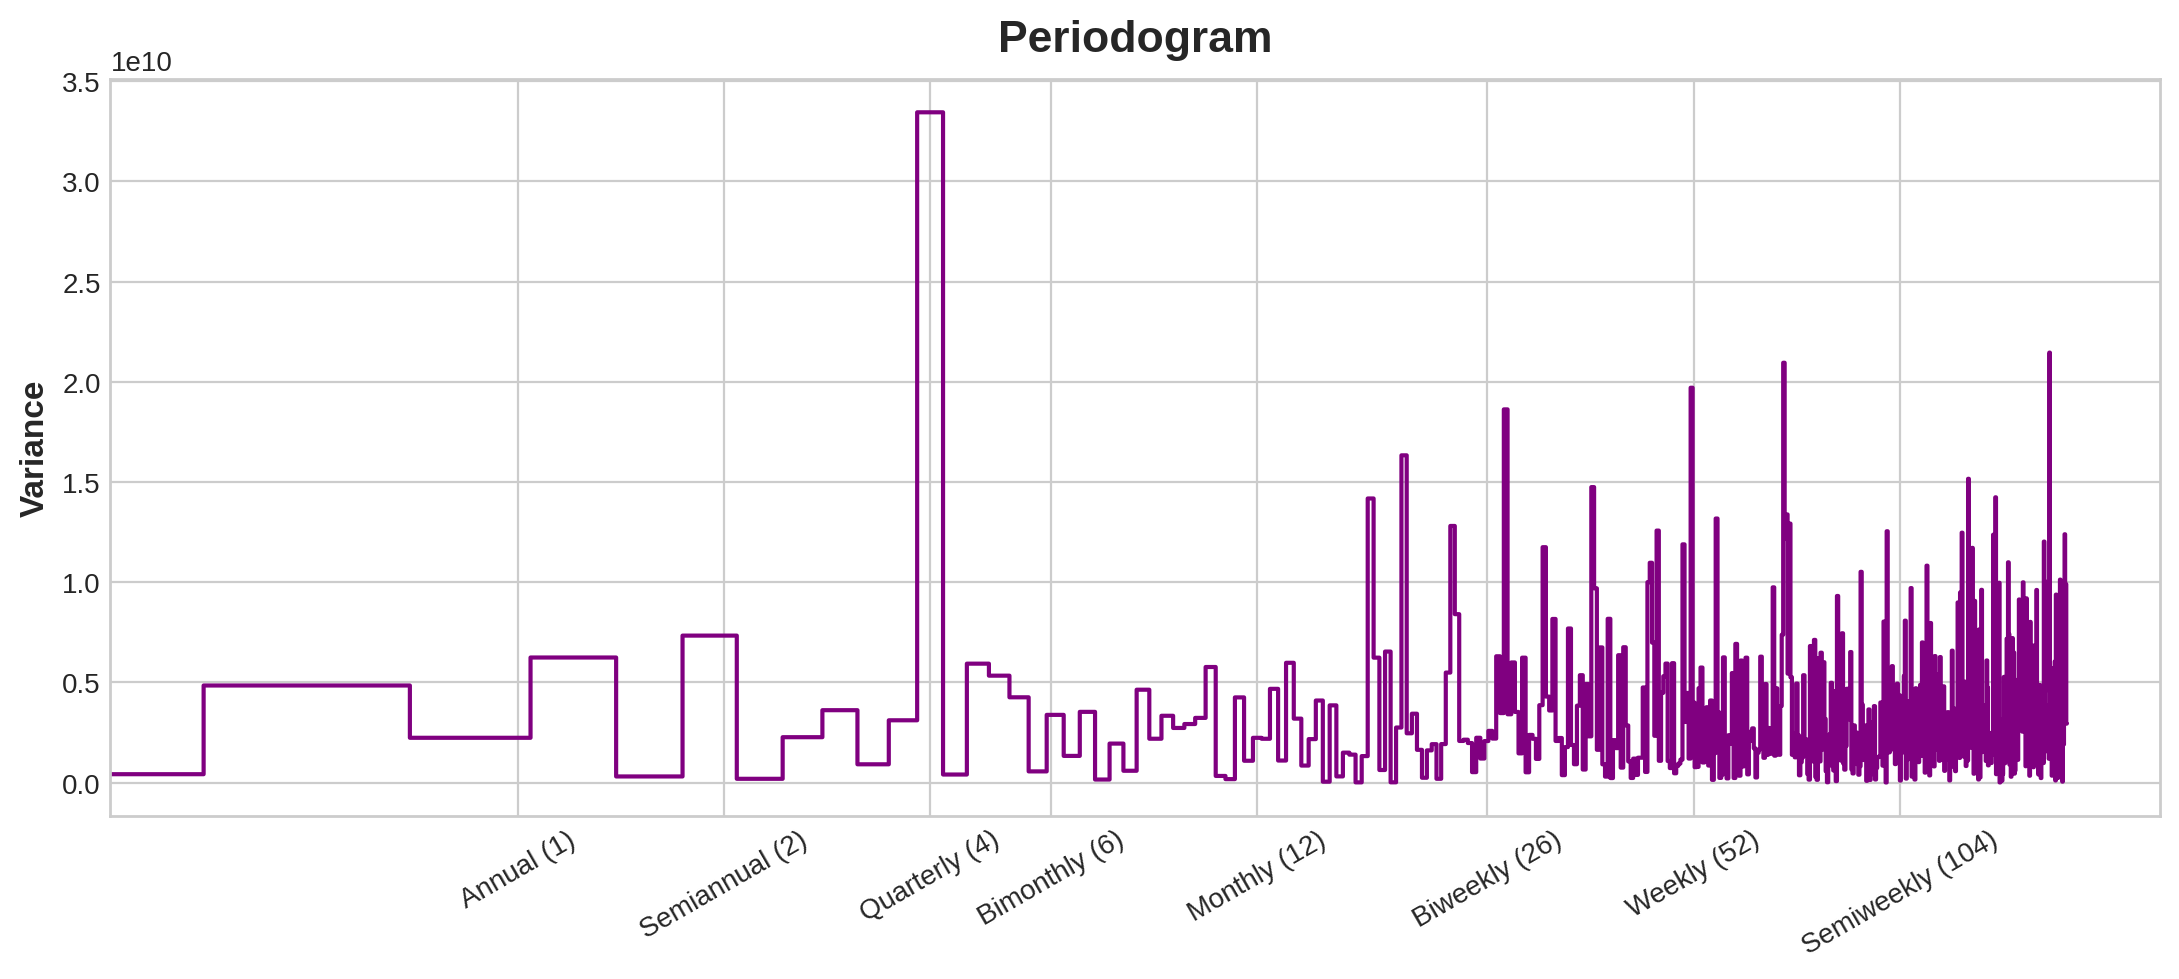

In [25]:
plot_periodogram(sales_df['Total_Revenue'])

The periodogram shows the seasonality of the data. There might be some seasonality quaterly, semiannually and annually.